In [1]:
import os
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
#sns.set(style="darkgrid")
from keras.models import load_model

Using TensorFlow backend.


In [2]:
TIMESTEPS = 1000
MIN_FAULT_DURATION = 12

In [3]:
df = pd.read_excel("time_series_all.xlsx")

In [4]:
df

,Feeder,Measurand,0,1,2,3,4,5,6,7,...,14490,14491,14492,14493,14494,14495,14496,14497,14498,14499
0,0,KV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B-4 S.J. ENCL.,AMPs,59.279,59.279,59.279,59.279,55.2146,55.2146,55.2146,55.2146,...,40.7447,40.7447,40.7447,50.2752,50.2752,50.2752,50.2752,62.5414,62.5414,62.5414
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981392,-0.981392,-0.981392,-0.981995,-0.981995,-0.981995,-0.981995,...,-0.964221,-0.964221,-0.964221,-0.973871,-0.973871,-0.973871,-0.973871,-0.98305,-0.98305,-0.98305
3,PANKHA RD CKT-2,AMPs,84.2096,84.2096,84.2096,84.2096,71.1225,71.1225,71.1225,71.1225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PANKHA RD CKT-2,KV,68.7123,68.7123,68.7123,68.7123,68.7763,68.7763,68.7763,68.7763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PANKHA RD CKT-2,PF,-0.993832,-0.993832,-0.993832,-0.993832,-0.994503,-0.994503,-0.994503,-0.994503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IGNOU S/S -3(Feeder 1),AMPs,50.6842,50.6842,50.6842,50.6842,47.0453,47.0453,47.0453,47.0453,...,33.5321,33.5321,33.5321,38.4531,38.4531,38.4531,38.4531,47.1678,47.1678,47.1678
7,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996355,-0.996355,-0.996355,-0.996485,-0.996485,-0.996485,-0.996485,...,-0.997994,-0.997994,-0.997994,-0.998952,-0.998952,-0.998952,-0.998952,-0.998727,-0.998727,-0.998727
8,1-OKHLA (SPARE),AMPs,21.7221,21.7221,21.7221,21.7221,19.3694,19.3694,19.3694,19.3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1-OKHLA (SPARE),KV,66.5628,66.5628,66.5628,66.5628,66.762,66.762,66.762,66.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df = df.reset_index(drop=True)

In [7]:
for i in df.columns[2:]:
    if(df[df.iloc[:,i]=='External identity error'].shape[0] != 0):
        df = df[df.iloc[:,i]!='External identity error']

C:\Users\u_kan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Resolution decreased - 1 hr

In [8]:
l = list(range(1,14000,4))
l.insert(0,'Feeder')
l.insert(1,'Measurand')

In [9]:
dff = df[l]

In [10]:
dff

,Feeder,Measurand,1,5,9,13,17,21,25,29,...,13961,13965,13969,13973,13977,13981,13985,13989,13993,13997
0,0,KV,0,0,0,0,0,0,0,0,...,0,52.9618,52.9008,53.4501,52.8397,52.8092,54.2131,52.7482,54.5793,54.5793
1,B-4 S.J. ENCL.,AMPs,59.279,55.2146,53.5783,50.199,49.1715,51.5043,54.3287,53.1617,...,67.434,63.3062,57.609,54.844,52.5823,49.5275,48.9819,51.8573,56.636,57.4393
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981995,-0.977454,-0.974945,-0.973284,-0.968893,-0.968026,-0.970689,...,-0.986562,-0.984885,-0.980423,-0.979735,-0.969004,-0.970104,-0.970679,-0.950082,-0.956177,-0.95474
3,IGNOU S/S -3(Feeder 1),AMPs,50.6842,47.0453,45.3992,44.8068,44.1599,42.8744,41.7501,44.4888,...,41.8592,40.0655,44.042,45.2999,38.1166,35.8424,32.9916,34.2306,34.2306,35.8432
4,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996485,-0.99766,-0.997741,-0.99738,-0.998821,-0.998663,-0.995812,...,-0.997208,-0.995261,-0.996108,-0.995599,-0.996334,-0.996389,-0.997183,-0.994392,-0.993183,-0.993386
5,CKT 2 PAPPANKALAN,AMPs,111.635,97.6701,91.6659,88.9646,90.058,106.832,167.083,260.174,...,63.9543,73.4614,74.2103,68.9588,62.7749,59.115,54.413,54.0669,53.5102,57.0059
6,CKT 2 PAPPANKALAN,KV,70.1961,70.2288,70.6763,70.9992,71.241,70.5069,68.1071,67.2777,...,67.4672,66.9533,66.8659,67.0037,67.9309,68.2156,68.2339,68.326,68.4864,68.3384
7,CKT 2 PAPPANKALAN,PF,-0.993118,-0.990419,-0.989444,-0.987249,-0.988496,-0.992268,-0.997058,-0.994797,...,1,0.997582,0.9976,0.997402,0.997189,0.994949,0.995092,0.995932,0.996034,0.995947
8,CKT 2 MEHRAUILI I/C,AMPs,57.005,54.5396,48.8387,46.5635,45.646,45.6812,53.6347,55.7416,...,48.8769,47.1917,48.3515,54.6723,52.6404,50.4269,48.2861,51.367,51.4565,45.8522
9,CKT 2 MEHRAUILI I/C,PF,-0.988547,-0.986929,-0.989987,-0.986021,-0.984567,-0.987035,-0.972462,-0.967557,...,-0.973338,-0.977112,0.974557,0.988831,-0.973604,-0.977668,-0.976915,0.983609,-0.974026,-0.984179


In [11]:
dff.set_index(['Feeder', 'Measurand'])

1         5      \
Feeder                                   Measurand                       
0                                        KV                0         0   
B-4 S.J. ENCL.                           AMPs         59.279   55.2146   
                                         PF        -0.981392 -0.981995   
IGNOU S/S -3(Feeder 1)                   AMPs        50.6842   47.0453   
                                         PF        -0.996355 -0.996485   
CKT 2 PAPPANKALAN                        AMPs        111.635   97.6701   
                                         KV          70.1961   70.2288   
                                         PF        -0.993118 -0.990419   
CKT 2 MEHRAUILI I/C                      AMPs         57.005   54.5396   
                                         PF        -0.988547 -0.986929   
BHAIRON RD                               AMPs        33.5153   31.6728   
                                         PF         0.981325  0.981325   
Incomer 2 MEHRAULI CKT2                  AMPs              0         0   
                                         KV          67.1221   67.6275   
                                         PF               -1        -1   
Incomer  OKHLA CKT 4                     AMPs              0         0   
                                         KV          34.1449   34.2107   
                                         PF               -1        -1   
S/S-11 D-4 V.KUNJ                        AMPs        53.0218   48.6972   
                                         PF        -0.969788 -0.974108   
DMRC + CARRIAPPA MARG SAINIK FORM        AMPs        9.15866   8.50337   
                                         PF        -0.992352 -0.996645   
SUBHAS VIHAR-1                           AMPs        69.4177   69.4177   
                                         PF         0.987461  0.987461   
CAPBANK-4                                AMPs              0         0   
                                         KV          10.8282    10.928   
CPWD SS5A                                AMPs              0         0   
                                         PF               -1        -1   
PUNJABI BASTI                            AMPs        48.6398   48.6398   
                                         PF        -0.997177 -0.997177   
...                                                      ...       ...   
B-1/283 VISH GAD                         AMPs         32.807   34.4186   
                                         PF        -0.959744 -0.895139   
1616JANTA FLATS                          AMPs             59        59   
                                         PF                0         0   
T-OFF MATIYALA PANKH.                    AMPs        23.5459    19.391   
                                         KV          64.9818   64.9028   
VENKATSWARA HOSPITAL-1                   AMPs              0         0   
                                         PF                0         0   
PLOT 8 DC                                AMPs        9.39418   7.71328   
                                         PF               -1        -1   
SEC-1 S/S-1 PUSHP VHR                    AMPs        66.6777   63.1926   
                                         PF         0.969092  0.968378   
J.J KHANPUR                              AMPs        101.691   95.5379   
                                         PF        -0.960588 -0.959253   
LODHI ROAD I/C NO.2                      AMPs       0.239037  0.201137   
                                         KV          33.8022   33.9751   
                                         PF               -1        -1   
400KV MUNDKA CKT                         AMPs        235.961   207.841   
                                         KV          11.2356   11.1912   
                                         PF         0.988105        -1   
KHANPUR KATTAWALA                        AMPs        77.9044   72.7136   
                                         PF        -0.97335

In [12]:
feeders = []
for i in dff['Feeder'].unique():
    tdf = dff[df['Feeder']==i]
    measurands = [tdf[tdf['Measurand']=='AMPs'].values, tdf[tdf['Measurand']=='KV'].values, tdf[tdf['Measurand']=='PF'].values]
    if len(measurands[0])==0: continue
    feeder = []
    for m in measurands:
        if len(m) != 0:
            feeder.append(m[0][2:])
        else:
            feeder.append(-np.ones(3500))
                
    feeders.append(feeder)
feeders = np.array(feeders)

In [13]:
feeders.shape

(1329, 3, 3500)

In [14]:
def isSubArray(A, n, m, st):
    B = [0] * m
    ii = st
    j = 0
    while (ii < n and j < m): 
        if (A[ii] == B[j]): 
            ii += 1 
            j += 1 
            if (j == m): 
                return ii,True
        else: 
            ii = ii - j + 1 
            j = 0 
    return ii,False 

In [15]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][:TIMESTEPS]
    r = isSubArray(xx.tolist(), TIMESTEPS, MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))                      # i=index, r[0]='timestamp', r[1]=fault
l = pd.DataFrame(l)
l

,0,1
0,2,596
1,3,433
2,5,85
3,6,12
4,7,229
5,10,12
6,11,12
7,13,626
8,14,582
9,18,672


In [16]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
feeders = feeders[indices]
len(feeders)

797

# faults

In [17]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][TIMESTEPS:]
    r = isSubArray(xx.tolist(), len(xx), MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))
l = pd.DataFrame(l)

In [18]:
# l: 0=index, 1='timestamp', 2=fault
X_fault_indices = pd.DataFrame(zip(l[0], l[1], l[1].apply(
    lambda t: list(range(t-MIN_FAULT_DURATION, t+TIMESTEPS-MIN_FAULT_DURATION))))) # l[1] is already fault - TIMESTEPS
X_fault = []
for i in X_fault_indices.values:
    X_fault.append(feeders[i[0]][:,i[2]])
    
X_fault = np.array(X_fault)                 # 0 - df index for future use
#X_fault = pd.DataFrame(list(X_fault[1].values))

In [19]:
X_fault.shape #.reshape(X_fault.shape[0], X_fault.shape[1], X_fault.shape[2], 1)

(292, 3, 1000)

# no fault
selected randomly from !l

In [75]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
no_faults = feeders[indices]
no_faults.shape

(505, 3, 3500)

In [76]:
X_no_faults = []

for i in range(len(no_faults)):
    r = np.random.randint(feeders.shape[2] - TIMESTEPS)
    X_no_faults.append(no_faults[i][:, r:r+TIMESTEPS])
    
X_no_faults = np.array(X_no_faults)
X_no_faults.shape

(505, 3, 1000)

In [77]:
X = np.concatenate([X_no_faults, X_fault])
y = np.array([0]*len(X_no_faults) + [1]*len(X_fault))

In [78]:
X.shape, y.shape

((797, 3, 1000), (797,))

In [79]:
X = np.transpose(X, (0, 2, 1))

In [80]:
X.shape

(797, 1000, 3)

In [81]:
# Spliting into traing and testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
x_train.shape,x_test.shape

((637, 1000, 3), (160, 1000, 3))

In [83]:
model = Sequential()
model.add(LSTM(256,dropout = 0.2,recurrent_dropout=0.2, input_shape=(x_train.shape[1],x_train.shape[2]))) # dropout = 0.2,recurrent_dropout=0.2,
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=1000)

Train on 509 samples, validate on 128 samples
Epoch 1/100
509/509 [==============================] - 6s 11ms/step - loss: 0.6448 - acc: 0.6326 - val_loss: 0.6402 - val_acc: 0.6562
Epoch 2/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6537 - acc: 0.6306 - val_loss: 0.6346 - val_acc: 0.6562
Epoch 3/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6561 - acc: 0.6149 - val_loss: 0.6313 - val_acc: 0.6484
Epoch 4/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6516 - acc: 0.6110 - val_loss: 0.6287 - val_acc: 0.6562
Epoch 5/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6419 - acc: 0.6326 - val_loss: 0.6241 - val_acc: 0.6641
Epoch 6/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6476 - acc: 0.5914 - val_loss: 0.6209 - val_acc: 0.6641
Epoch 7/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6338 - acc: 0.6306 - val_loss: 0.6178 - val_acc: 0.6797
Epoch 8/100
509/509 [=

Epoch 62/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6169 - acc: 0.6935 - val_loss: 0.6081 - val_acc: 0.7031
Epoch 63/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6005 - acc: 0.6974 - val_loss: 0.6098 - val_acc: 0.7031
Epoch 64/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6085 - acc: 0.6935 - val_loss: 0.6104 - val_acc: 0.7031
Epoch 65/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6098 - acc: 0.6935 - val_loss: 0.6099 - val_acc: 0.7031
Epoch 66/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6081 - acc: 0.6935 - val_loss: 0.6086 - val_acc: 0.6953
Epoch 67/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6038 - acc: 0.7112 - val_loss: 0.6089 - val_acc: 0.6953
Epoch 68/100
509/509 [==============================] - 4s 8ms/step - loss: 0.6057 - acc: 0.6857 - val_loss: 0.6096 - val_acc: 0.6953
Epoch 69/100
509/509 [==============================] - 4s 8ms

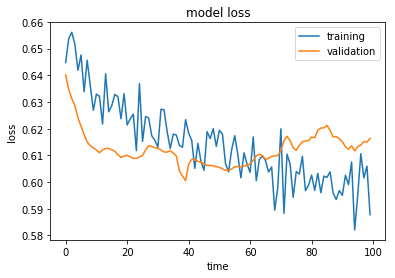

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

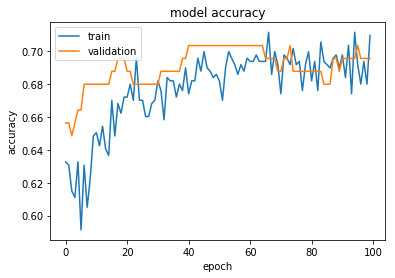

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [87]:
pred = model.predict(x_train)

In [88]:
model.evaluate(x_train, y_train)

637/637 [==============================] - 12s 19ms/step


[0.587679997250274, 0.704866560699427]

In [89]:
model.evaluate(x_test, y_test)

160/160 [==============================] - 3s 19ms/step


[0.67003892660141, 0.63125]

accuracy =  0.7048665620094191
precision =  0.23788546255506607
recall =  0.782608695652174
f1 =  0.36486486486486486


Text(0.5, 15.0, 'Predicted label')

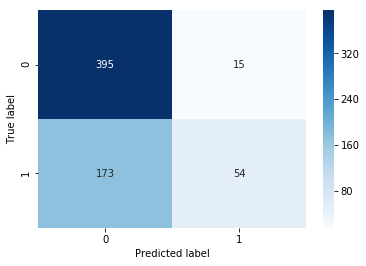

In [90]:
pred_train = model.predict_classes(x_train)

print('accuracy = ', accuracy_score(pred_train, y_train))
print('precision = ', precision_score(pred_train, y_train))
print('recall = ', recall_score(pred_train, y_train))
print('f1 = ', f1_score(pred_train, y_train))

cm = confusion_matrix(y_train,pred_train)
sns.heatmap(confusion_matrix(y_train,pred_train),annot=True,fmt='d',cmap="Blues") 
plt.ylabel('True label')
plt.xlabel('Predicted label')

accuracy =  0.63125
precision =  0.7142857142857143
recall =  0.15384615384615385
f1 =  0.25316455696202533


Text(0.5, 15.0, 'Predicted label')

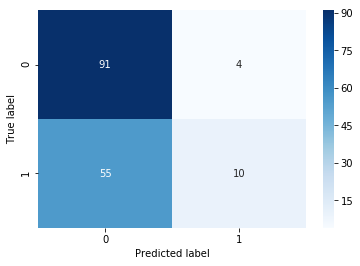

In [91]:
pred_test = model.predict_classes(x_test)

print('accuracy = ', accuracy_score(y_test,pred_test))
print('precision = ', precision_score(y_test,pred_test))
print('recall = ', recall_score(y_test,pred_test))
print('f1 = ', f1_score(y_test,pred_test))

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,fmt='d',cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [92]:
print(classification_report(y_test,pred_test , target_names = ['No Fault', 'Fault'] ))

              precision    recall  f1-score   support

    No Fault       0.62      0.96      0.76        95
       Fault       0.71      0.15      0.25        65

   micro avg       0.63      0.63      0.63       160
   macro avg       0.67      0.56      0.50       160
weighted avg       0.66      0.63      0.55       160



In [93]:
x_test = np.transpose(x_test, (0, 2, 1))

In [94]:
mask = pred_test == 1
predicted_faults = [i for i in range(len(pred_test)) if mask[i]==True]

for fault in x_test[predicted_faults]:
    for m in fault:
        print(list(m))
        print('\n')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

[32.699856, 32.655582, 34.092194, 31.962183, 38.780987, 42.663879, 45.259468, 39.564663, 35.336269, 34.253281, 32.790913, 30.804167, 32.63974, 32.760464, 33.849873, 33.79512, 36.006939, 38.244717, 33.987804, 37.31461, 36.326443, 34.185146, 34.681931, 33.968342, 34.720444, 34.230164, 43.486969, 43.023827, 43.023827, 41.764908, 37.541683, 35.589973, 34.137764, 31.496033, 33.039722, 32.277729, 32.555367, 33.029453, 34.879562, 34.017391, 33.679035, 33.542725, 32.098328, 30.599829, 32.22744, 34.639198, 32.81414, 33.505215, 36.414276, 42.823853, 47.428242, 47.995533, 45.935734, 39.772301, 38.408829, 35.057987, 34.813179, 34.899418, 33.677906, 34.375401, 36.487354, 33.514149, 37.304893, 36.885529, 36.982773, 34.550907, 35.29142, 33.633541, 33.12936, 33.110706, 33.048592, 35.997047, 35.235634, 34.905598, 36.282146, 37.776619, 34.862717, 34.465199, 32.644024, 30.484655, 29.044655, 29.158651, 32.134106, 29.260891, 33.603745, 35.514851, 36.78886, 34.72472, 35.789021, 35.767162, 36.759743, 36.6123

[0.915557, 0.955361, -0.996999, -0.997816, -0.996846, 0.989415, 0.97675, 0.985697, -0.994043, 0.991513, -0.997692, -0.998742, 0.927831, -0.972416, -0.973124, -0.943139, -0.92536, -0.912896, -0.970209, -0.96607, -0.96656, -0.965972, -0.970745, -0.990959, 0.977622, 0.99162, -1.0, -0.998239, -0.998306, -0.998635, -1.0, -0.994501, -0.993247, -0.996437, -0.990667, -0.990257, -0.989566, -0.980623, -0.989698, -0.985497, -0.991336, -0.992408, -0.994677, -0.995736, -0.990733, -0.988081, -0.992766, -1.0, -1.0, -0.998003, -1.0, -0.978569, -1.0, -0.995773, -0.998903, -0.998923, -1.0, -0.980362, -0.996212, -0.996126, -0.894288, -0.96116, -0.963001, -0.956409, -0.959373, -0.951361, -0.952176, -0.963045, -0.994381, -0.994526, -0.950195, -1, -0.987635, -0.995359, -0.996426, -0.997891, -0.998943, -0.992566, -0.994498, -0.977108, -0.975234, -0.94302, -0.94302, -0.917754, -0.895216, -0.886892, -0.942735, -0.936249, -0.937022, -0.942771, -0.948702, -0.995879, -0.995943, -0.996703, -0.996656, -0.956432, -0

In [95]:
pred_mask.shape,labelled_mask[0]

NameError: name 'pred_mask' is not defined

pred_mask = pred_test==1
labelled_mask = list(y_test==1)
detected_faults = [i for i in range(len(pred_test)) if ((pred_mask[i][0]==True) == (labelled_mask==True))]
for fault in x_test[detected_faults]:
    for m in fault:
        print(list(m))
        print('\n')
    print('\n')

In [ ]:
pred_mask = pred_test==1
labelled_mask = list(y_test==1)
f_list = []
detected_faults = [i for i in range(len(pred_test)) if ((pred_mask[i][0]==True) and (labelled_mask[i]==True))]
for fault in x_test[detected_faults]:
    f_list.append(fault[0])

In [ ]:
d_amp = dff[dff['Measurand'] == 'AMPs']

In [ ]:
def isSubArray2(A, B, n , m):
    ii = 0
    j = 0
    while (ii < n and j < m): 
        if (A[ii] == B[j]): 
            ii += 1 
            j += 1 
            if (j == m): 
                return ii,True
        else: 
            ii = ii - j + 1 
            j = 0 
    return ii,False 

In [ ]:
feeder_with_fault = []
for ff in f_list:
    for i in range(d_amp.shape[0]):
        if(isSubArray2(list(d_amp.iloc[i,2:]),ff,d_amp.shape[1]-2,ff.shape[0])[1] == True):
            feeder_with_fault.append((d_amp.iloc[i,0],ff))
            break

In [ ]:
[i[0] for i in feeder_with_fault]

In [ ]:
labelled_mask = list(y_test==1)

actual_faults = [i for i in range(len(pred_test)) if labelled_mask[i]==True]
for fault in x_test[actual_faults]:
    for m in fault:
        print(list(m))
        print('\n')
    print('\n')